# 06b - ANOVA to detect non-baseline msk and variable configurations with early signals of ACC
- author: Johannes L. Fjeldså
- email: johannes.larsen.fjeldså@nmbu.no

## Import libraries


In [39]:
from pathlib import Path
from src.preproces import *
from src.plotting import *
from src.create_masked_climatology import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from xclim import ensembles as ens
import pandas as pd
import xarray as xr
import re

file_handler = Handle_Files()

# Investigate Ensambles

Till now we have investigated advanced masking of: 'tas', 'pr', 'txxETCCDI', 'gslETCCDI', 'fdETCCDI', 'rx5dayETCCDI'. We have kept:
|                             	| **tas** 	| **pr** 	| **txxETCCDI** 	| **rx5dayETCCDI** 	| **gslETCCDI** 	| **fdETCCDI** 	|
|-----------------------------	|:-------:	|:------:	|:-------------:	|:----------------:	|:-------------:	|:------------:	|
| **nomask**                 	|    X    	|    X   	|       X       	|         X        	|       X       	|       X      	|
| **land_mask**              	|    X    	|    X   	|       X       	|         X        	|               	|              	|
| **sea_mask**                	|    X    	|    X   	|       X       	|         X        	|               	|              	|
| **lat_mask_30N_70N**       	|         	|        	|               	|                  	|       X       	|       X      	|
| **land_mask_30N_70N**      	|         	|        	|               	|                  	|       X       	|       X      	|
| **lat_mask_pm30deg**       	|         	|        	|       X       	|         X        	|               	|              	|
| **sea_mask_pm30deg**       	|         	|    X   	|       X       	|                  	|               	|              	|
| **pr_large_deviation_mask** 	|         	|    X   	|               	|         X        	|               	|              	|

In total we have 3375 combinations perform analysis on. We will start by performing an anlysis of the correlation of varibales. The correlation betwenn varibles and masks will be taken within each SSP and within each year. We analyse a selection of years in the near term  period (2015-2041) [2020, 2030, 2040, 2050].

In [40]:
def extract_realisation_number(file_name):
    match = re.search(r'r\d+', file_name)
    return int(match.group(0)[1:])

In [52]:
main_data_dir = '/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies'
mask_names = file_handler.get_all_filenames_in_dir(main_data_dir)
SSPs = ['ssp126', 'ssp245', 'ssp370', 'ssp585']
years = [2020, 2030, 2040, 2050]
data_frames = {year: {} for year in years}
for year in years:
    columns = []
    for mask_name in mask_names:
        mask_data_dir = '/'.join([main_data_dir, mask_name])
        variables = file_handler.get_all_filenames_in_dir(mask_data_dir)
        for var in variables:
            columns.append(f'{var}: {mask_name}')
    
    for scenario in SSPs:
        data_frames[year][scenario] = pd.DataFrame(columns=columns, index=range(1, 41))
    
    for mask_name in mask_names:
        mask_data_dir = '/'.join([main_data_dir, mask_name])
        variables = file_handler.get_all_filenames_in_dir(mask_data_dir)

        for var in variables:

            for scenario in SSPs:
                data_dir = '/'.join([mask_data_dir, var, scenario])

                file_names = file_handler.get_all_netcdf_files_in_dir(data_dir)
                for file_name in file_names:
                    indx = extract_realisation_number(file_name)
                    ds = file_handler.read_netcdf_to_xr(directory=data_dir, 
                                                        file_name=file_name).sel(year=year)
                    data_frames[year][scenario].loc[indx, f'{var}: {mask_name}'] = ds[var].values.item()

In [55]:
data_frames[2020]['ssp245']

tas: sea_mask txxETCCDI: sea_mask pr: sea_mask rx5dayETCCDI: sea_mask  \
1     290.811396           22.924196      0.00004             110.078873   
2     291.109599           23.183093     0.000041             118.105329   
3     291.101384           23.246353     0.000041             114.808513   
4      290.95761           23.096446     0.000041             114.648356   
5     291.018029           23.149268     0.000041             115.260184   
6     290.944718            23.03689     0.000041             114.937332   
7     290.887991           23.022702     0.000041             118.641009   
8     291.002142           23.181674     0.000041             115.314757   
9     290.999802            23.12443     0.000041             116.969867   
10    290.892183           23.039251     0.000041             115.739296   
11    290.868426           22.960368     0.000041             113.816032   
12    290.976513           23.130669     0.000041             112.180942   
13    290.867523           23.103067     0.000041             118.572493   
14     290.94036           22.998603     0.000041             109.199036   
15    290.886595           23.076005     0.000041             113.013515   
16    291.081032           23.188027     0.000042             119.160488   
17    291.057837           23.132244     0.000041             116.758093   
18    291.013023            23.21462     0.000041             114.414824   
19    291.023732           23.148134     0.000041             117.419422   
20    290.983796            23.13866     0.000041             111.047396   
21    290.939251            23.03529     0.000041             114.977004   
22    290.886248           23.054678     0.000041             115.145915   
23    290.899354           23.090706     0.000041              114.00126   
24    290.923128           23.096731     0.000041             112.738039   
25    290.925724           23.054301     0.000041             113.553087   
26    291.051658           23.182622     0.000041             111.801419   
27    290.973735           23.100989     0.000041             111.853275   
28    291.038861           23.273013     0.000041             117.251579   
29    291.044314           23.152054     0.000041             114.628553   
30    290.949947           23.102843     0.000041             112.645136   
31    291.156124           23.326464     0.000041             118.117865   
32    290.833518           22.920439     0.000041             113.355554   
33    291.031423           23.152742     0.000041             116.619494   
34    290.940313           23.104539     0.000041             117.166322   
35    291.100914           23.221999     0.000042              118.94921   
36    290.837071           22.998844     0.000041             110.799607   
37    291.033213           23.117811     0.000041             109.339964   
38    291.067682           23.175943     0.000041             118.306202   
39    290.878258           22.978602     0.000041             112.693958   
40    291.100454           23.165913     0.000041             113.949739   

   gslETCCDI: lat_mask_30N_70N fdETCCDI: lat_mask_30N_70N  \
1                   243.709141                   98.30534   
2                   245.477117                  95.635502   
3                   243.041457                  98.830167   
4                   245.714211                  94.792672   
5                   245.531513                  95.372224   
6                   242.680723                  99.585914   
7                   243.180152                  97.424899   
8                   242.087307                  98.214619   
9                   241.384758                    99.2487   
10                   244.27733                  98.360325   
11                  246.488821                  95.494987   
12                  242.411729                   99.41897   
13                  242.274722                  99.978916   
14                  242.785802  

sjekk om det er stor forskjell mellom de forskjellige korrelasjonsmatrisene, hvis ikke bruk bare start

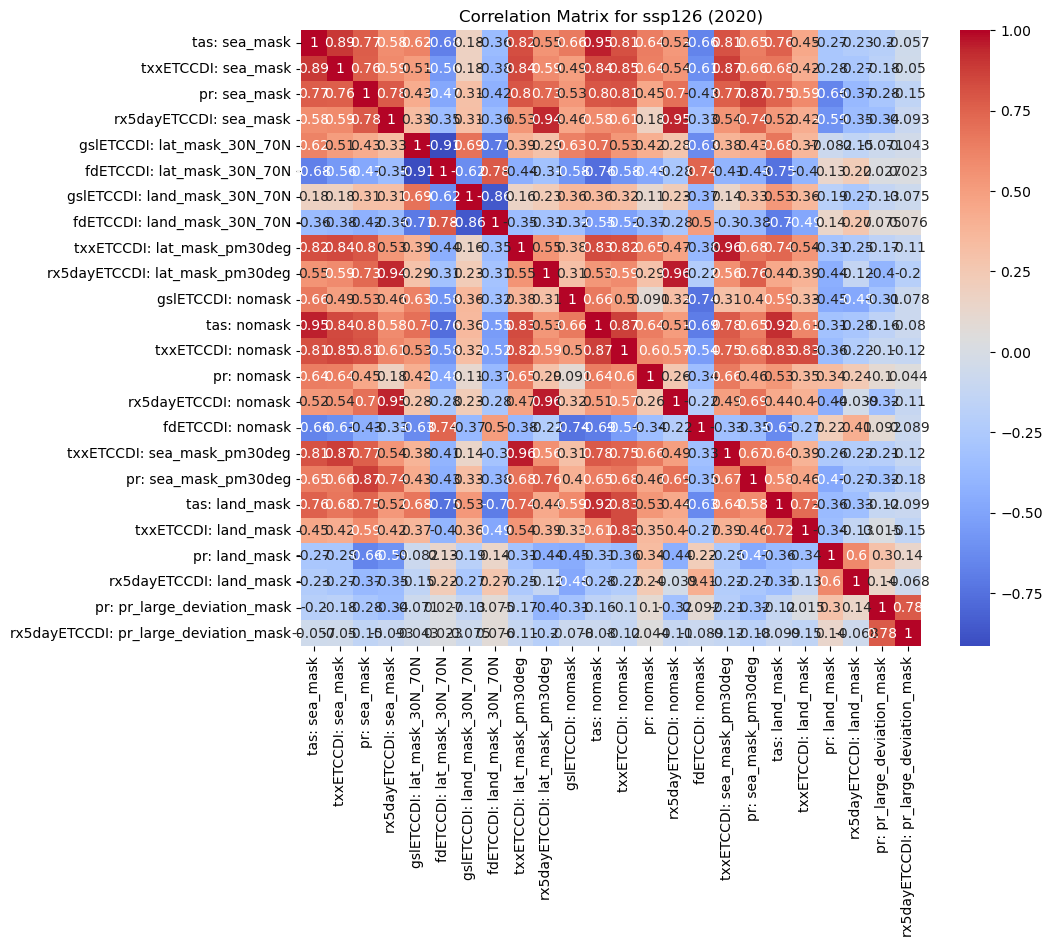

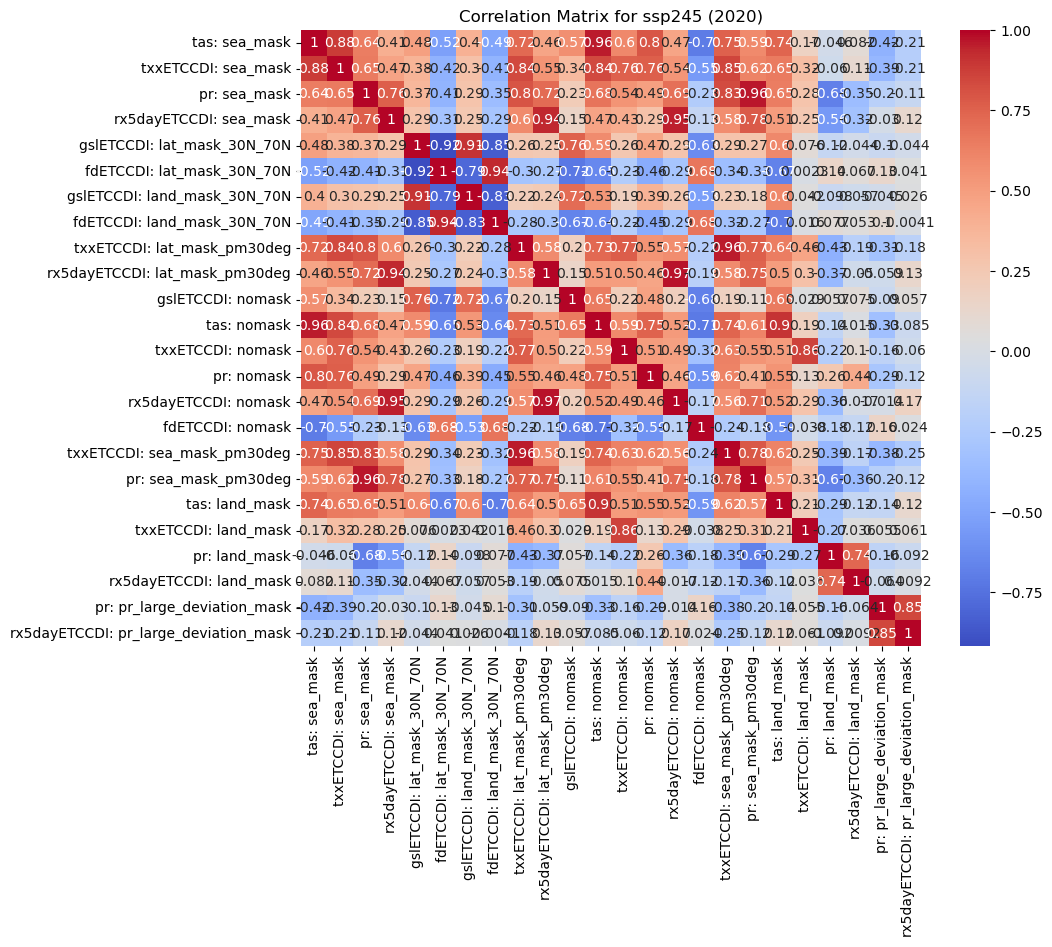

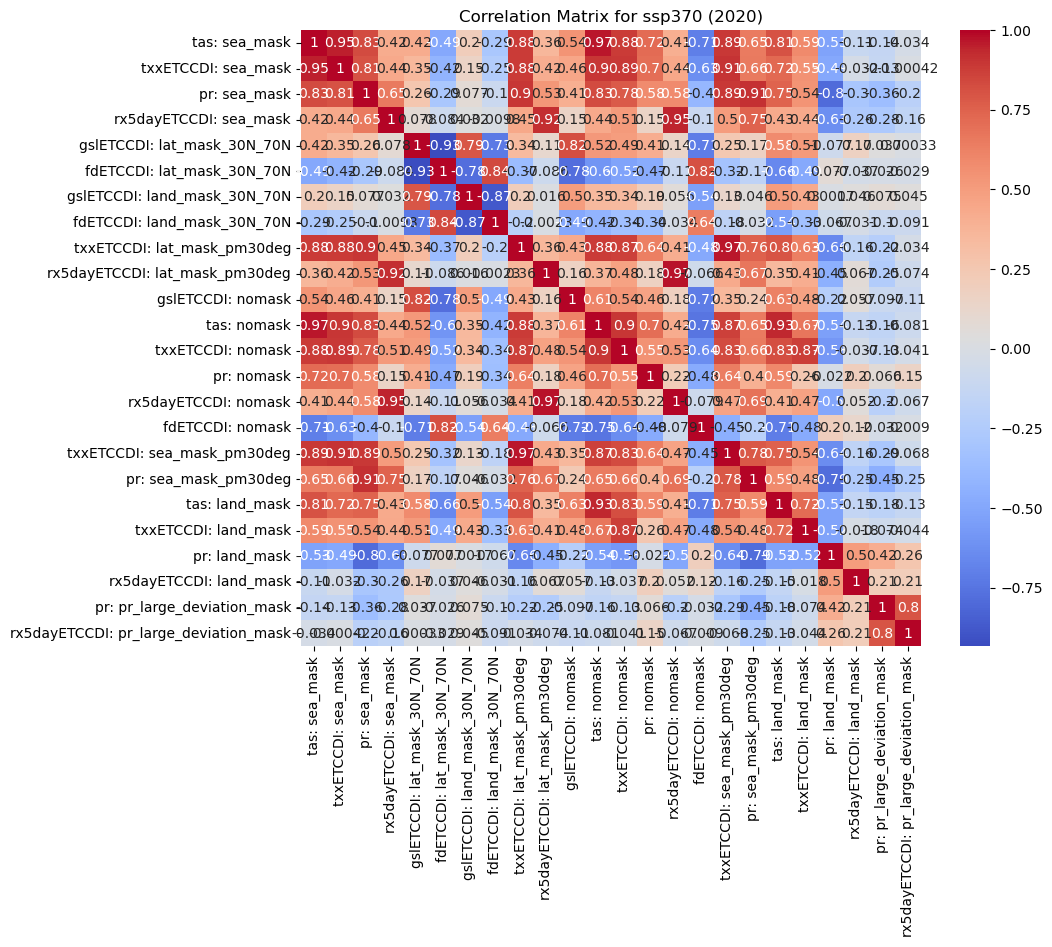

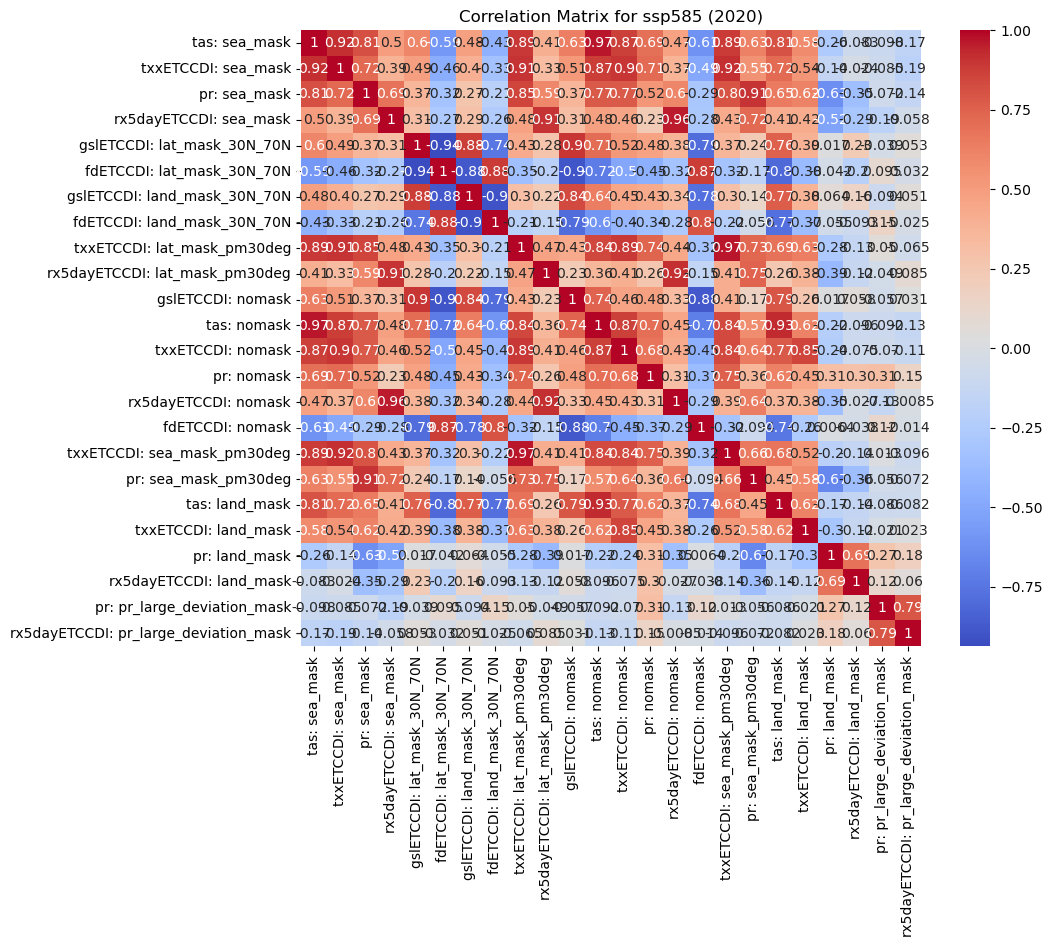

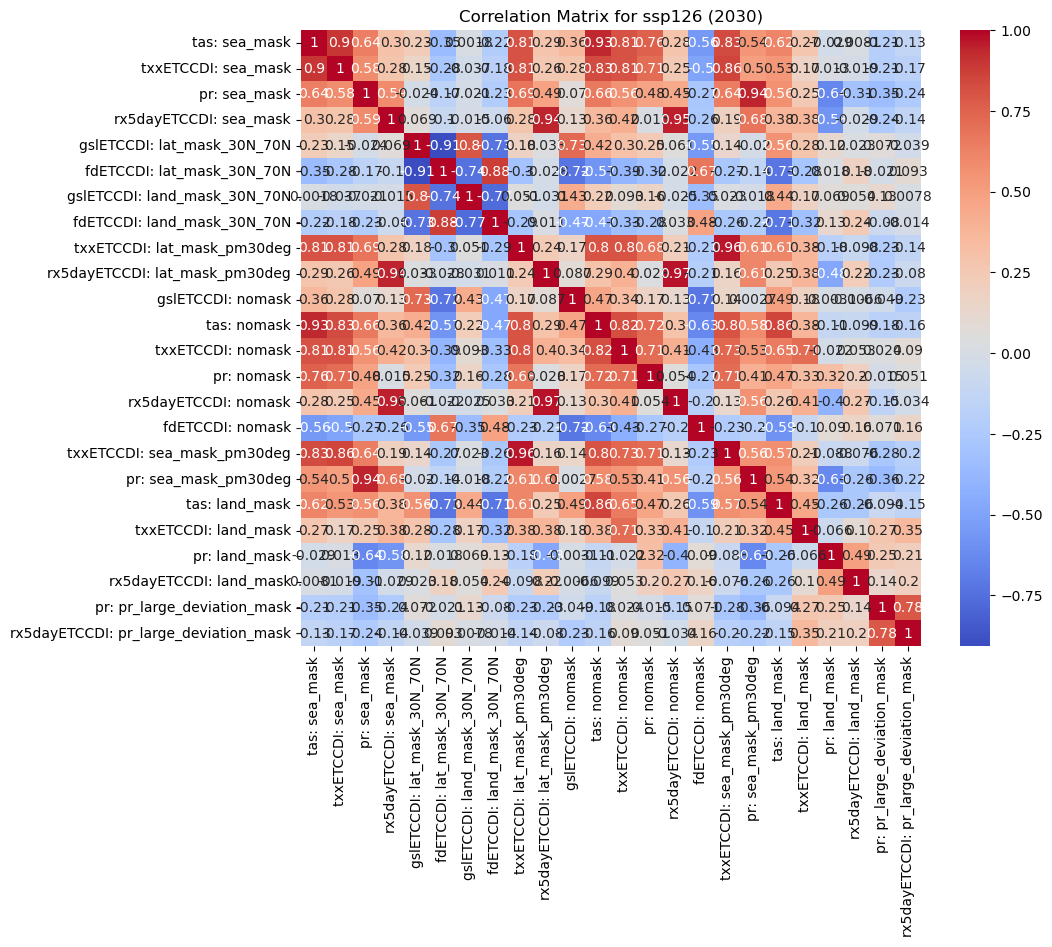

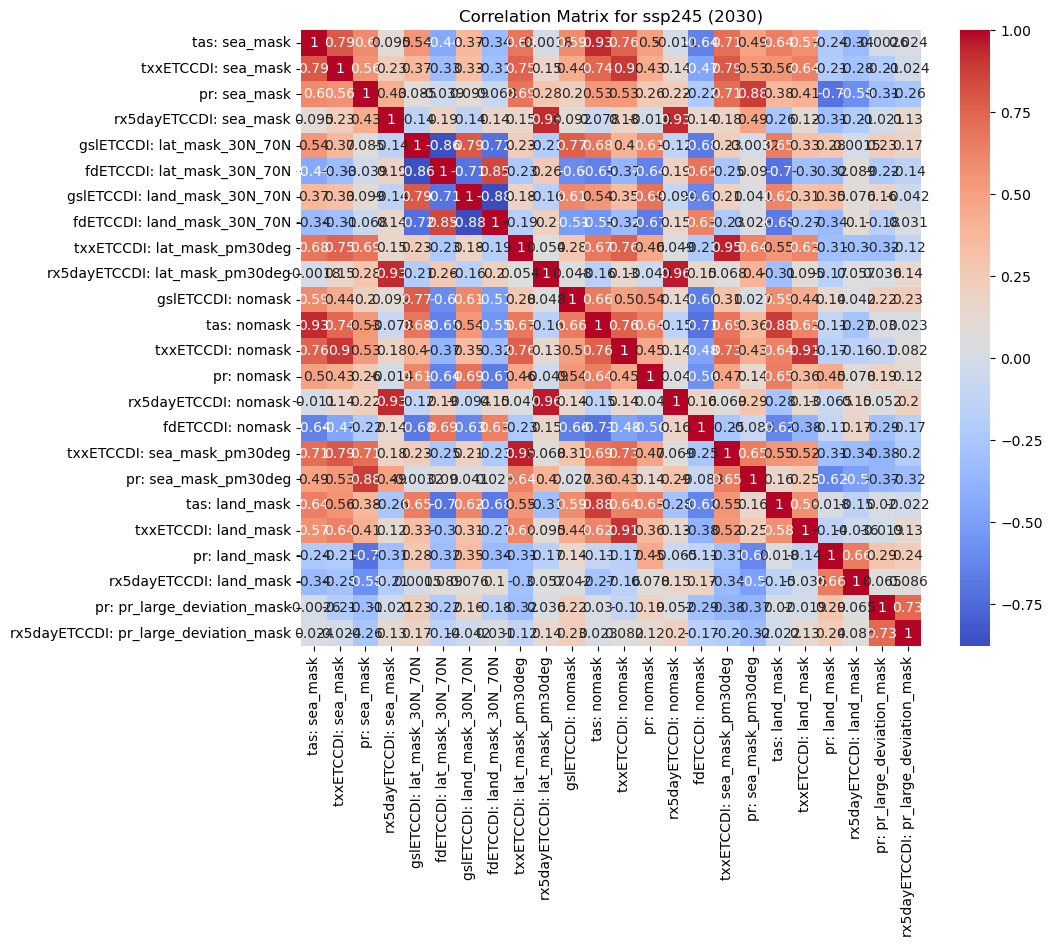

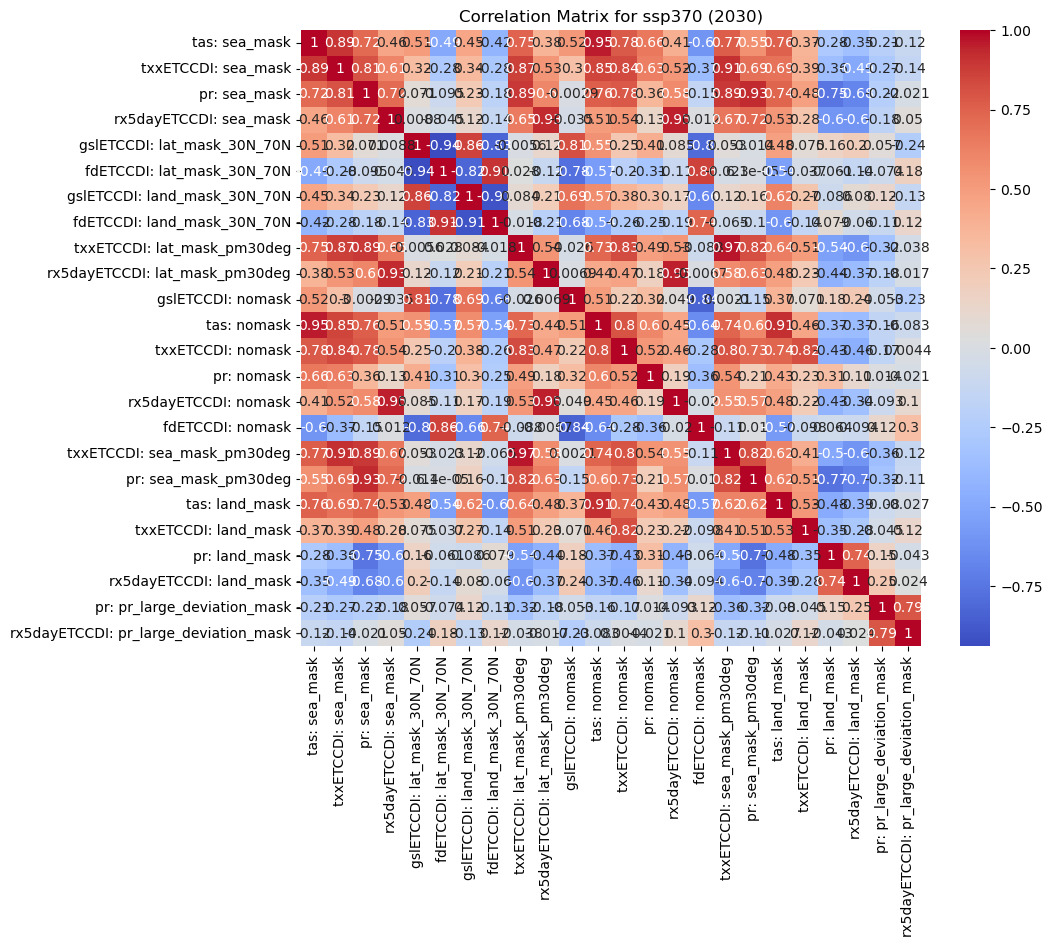

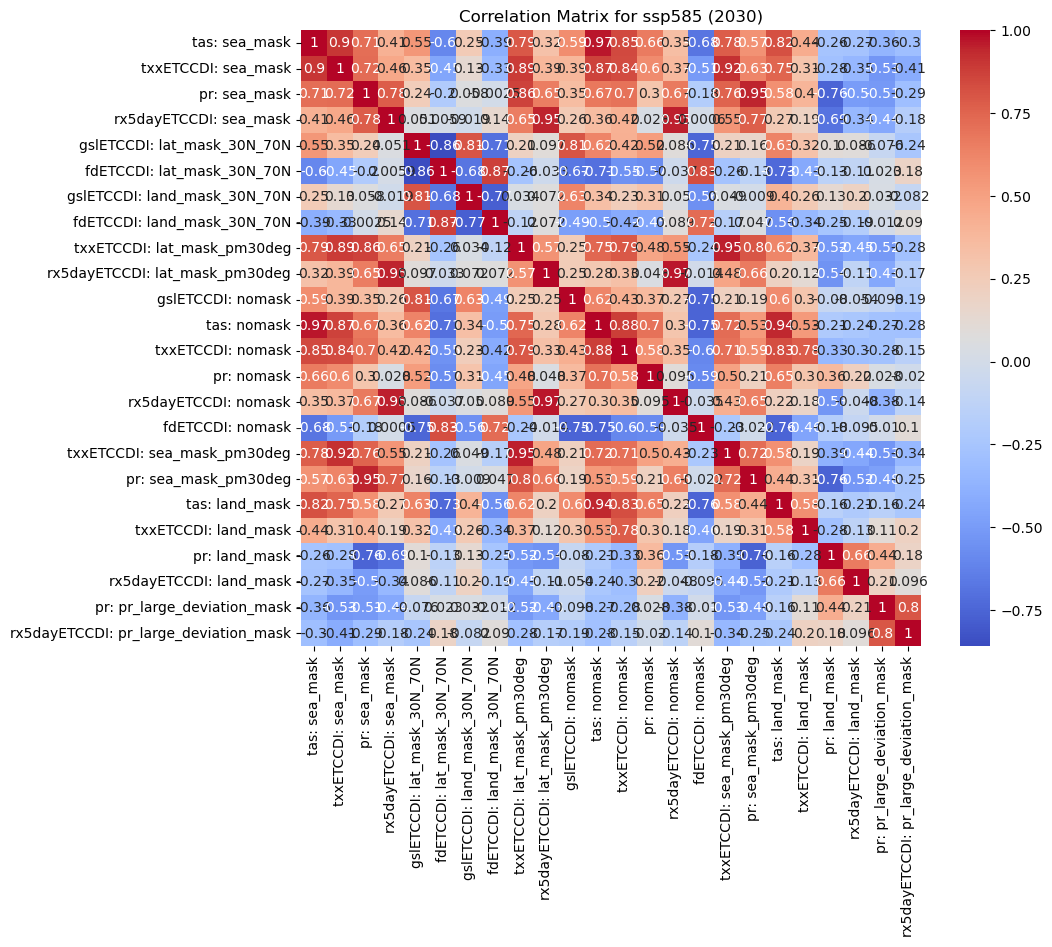

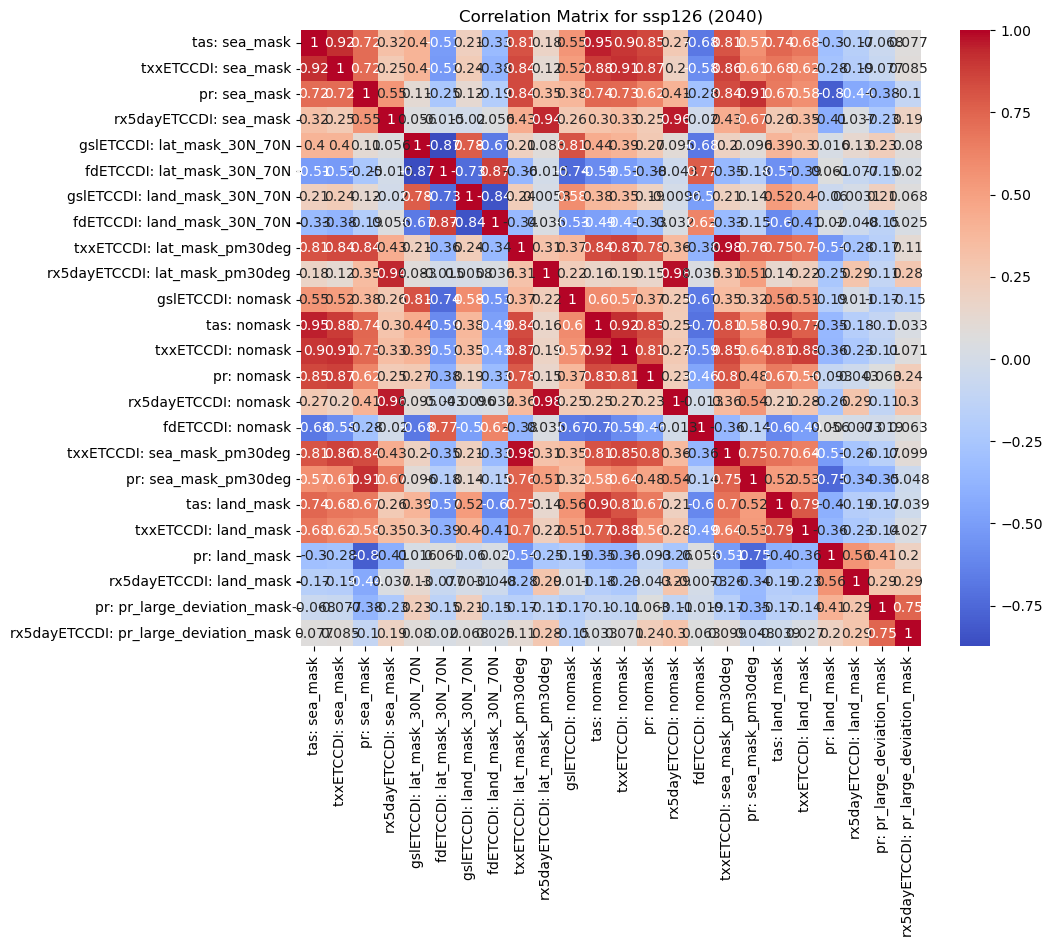

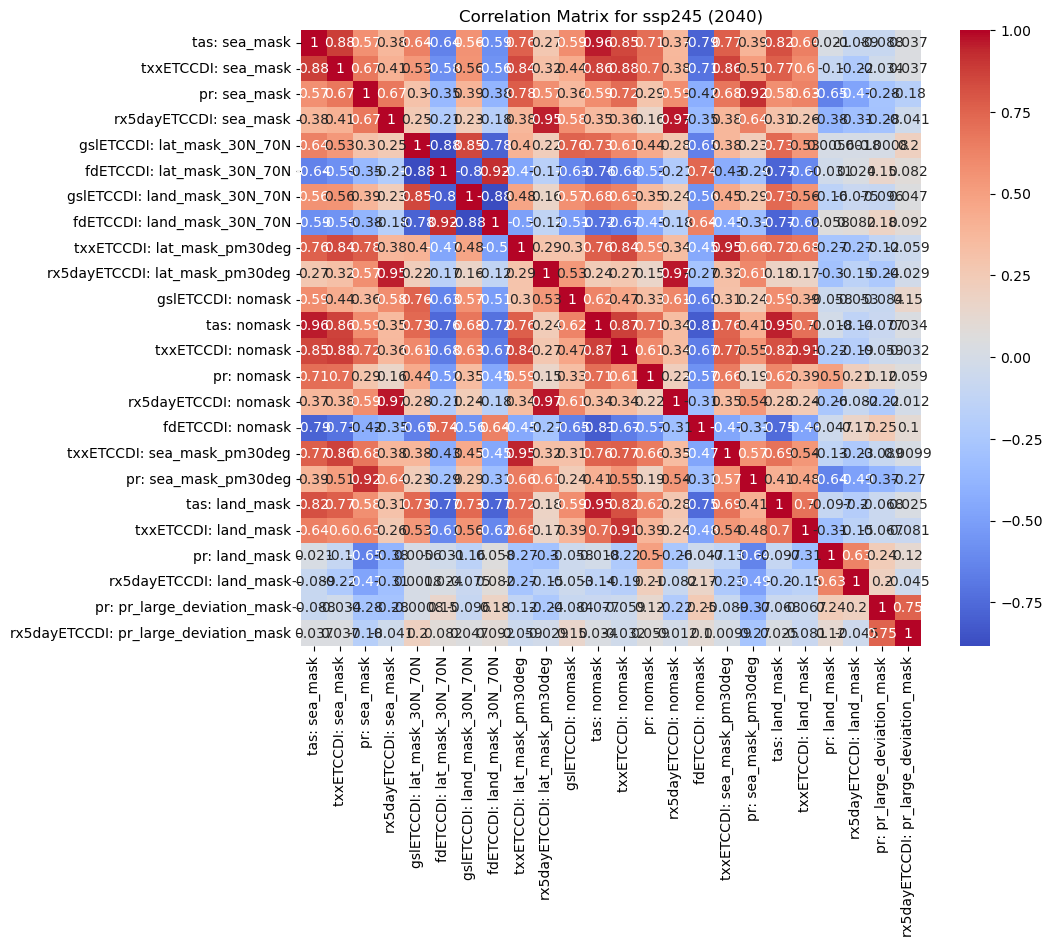

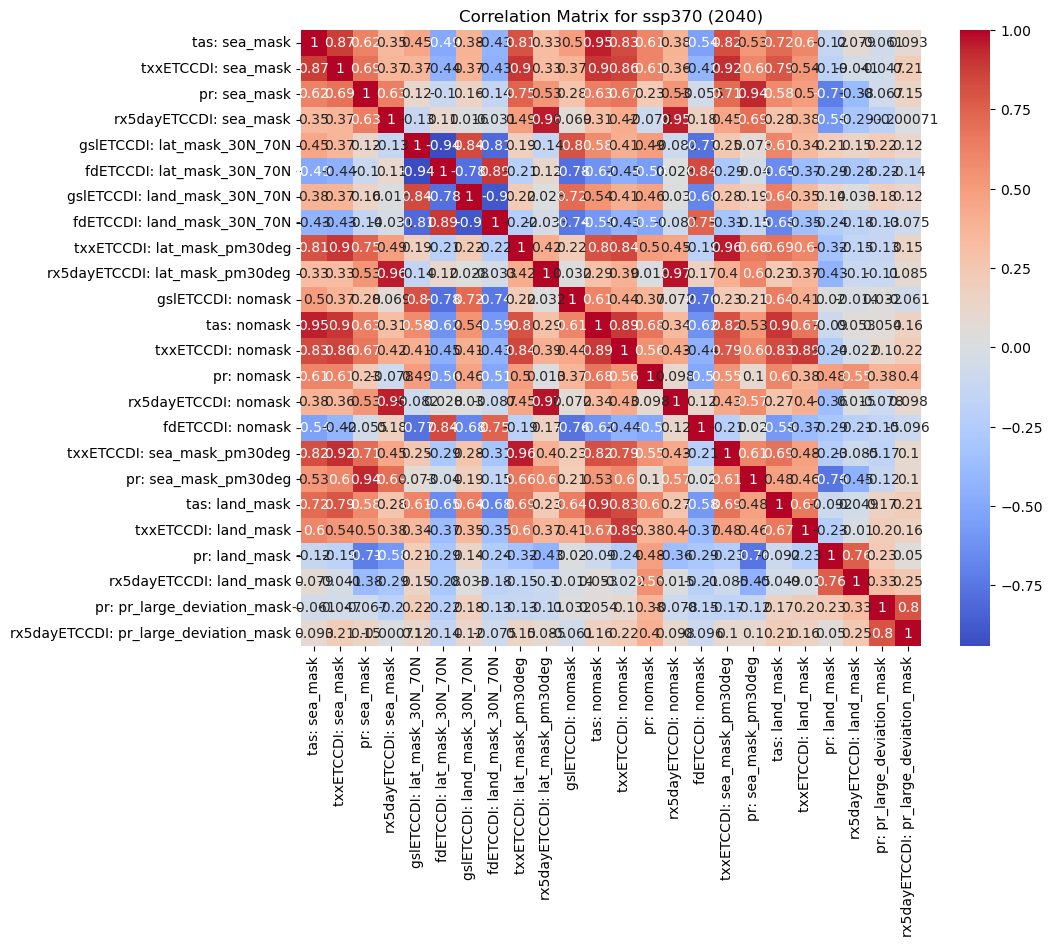

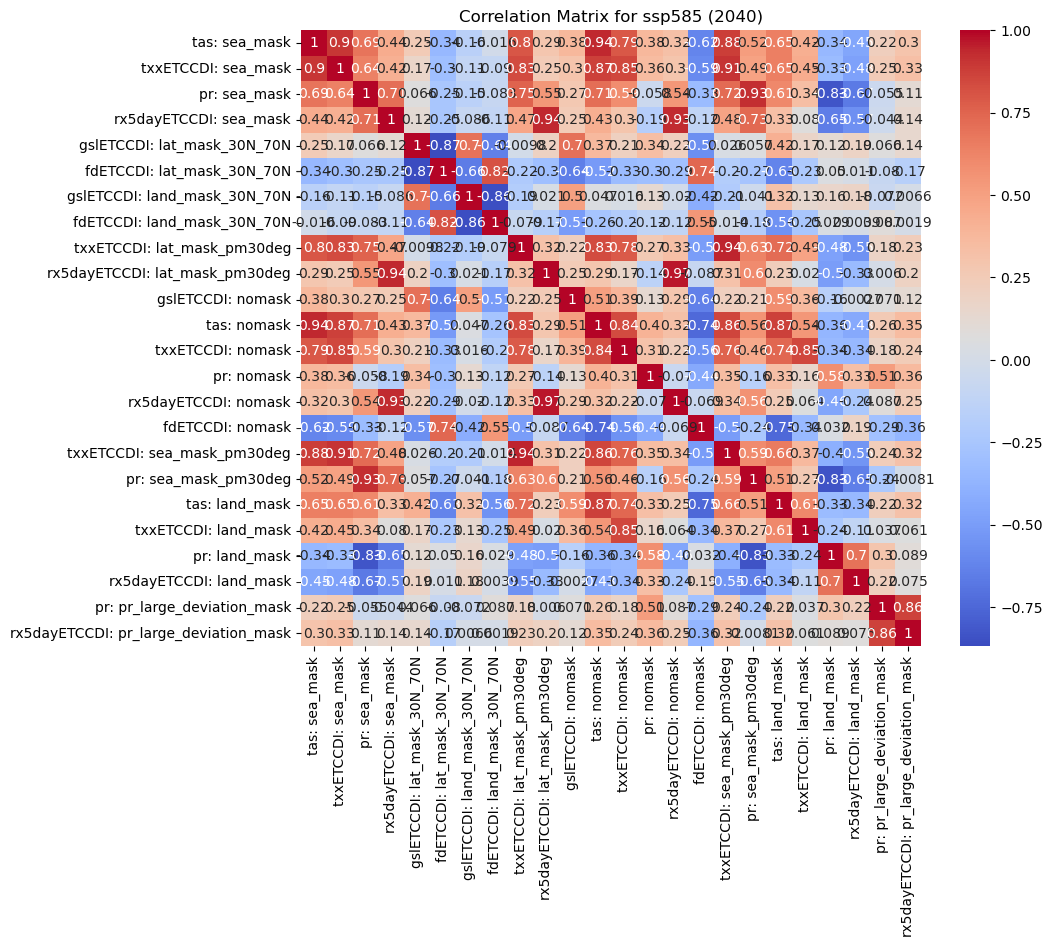

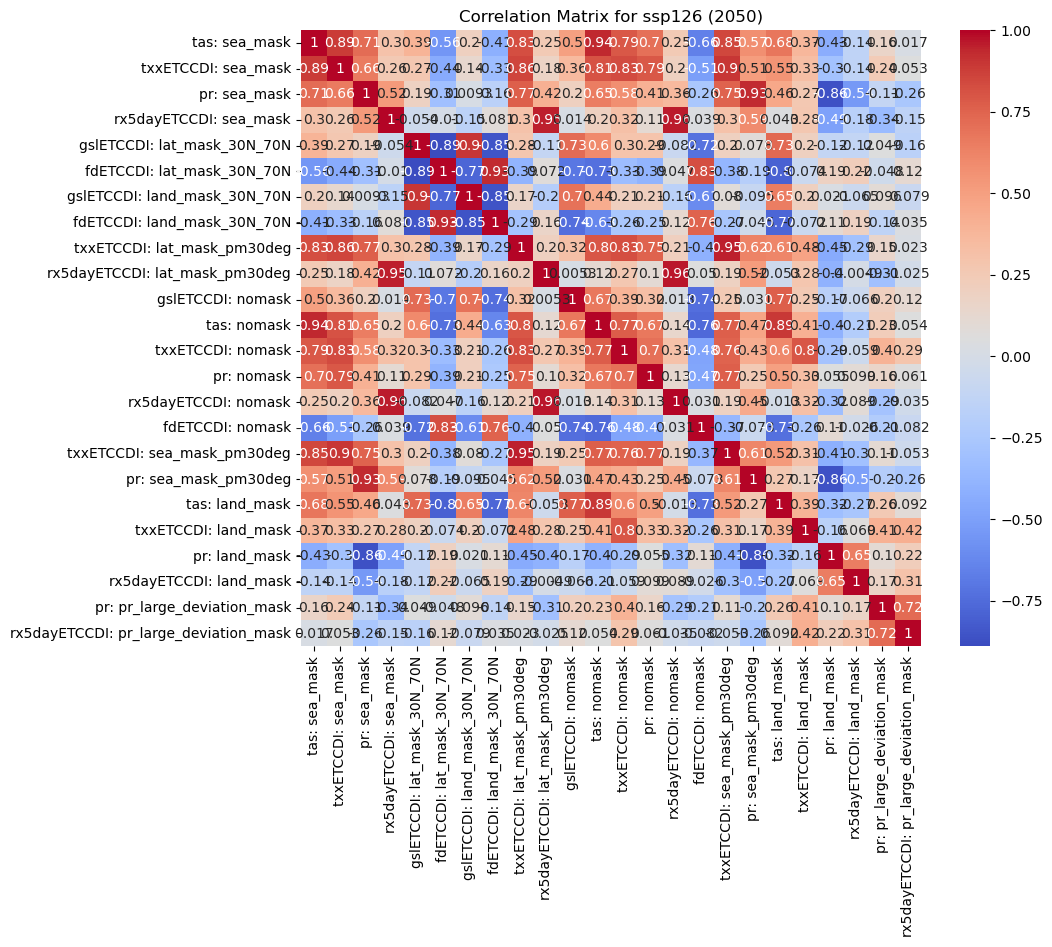

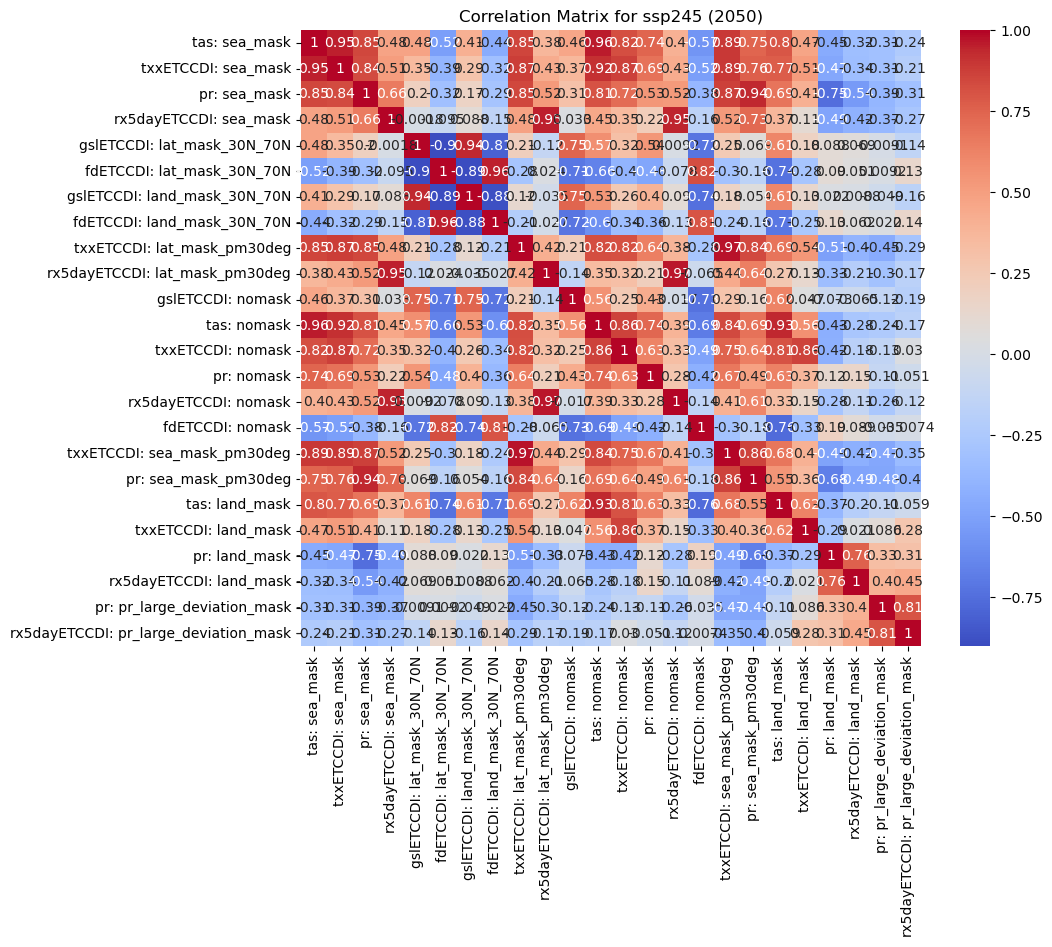

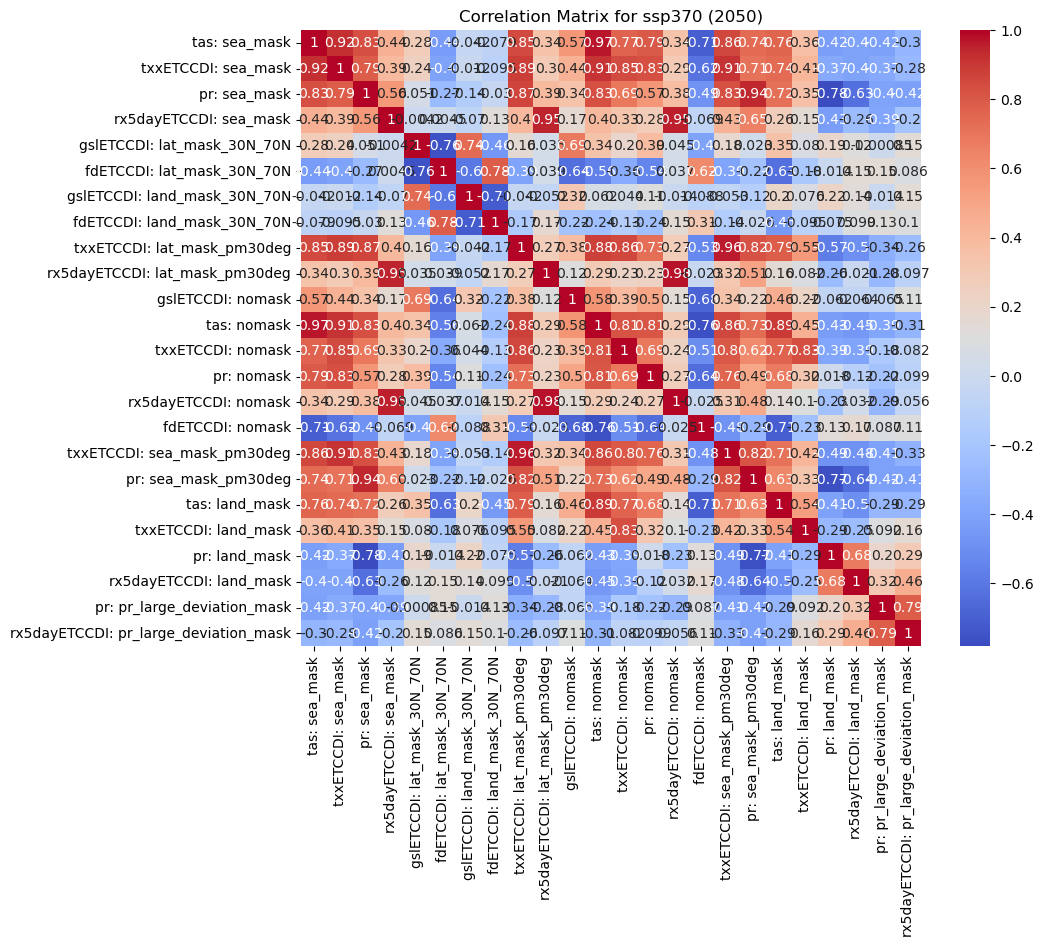

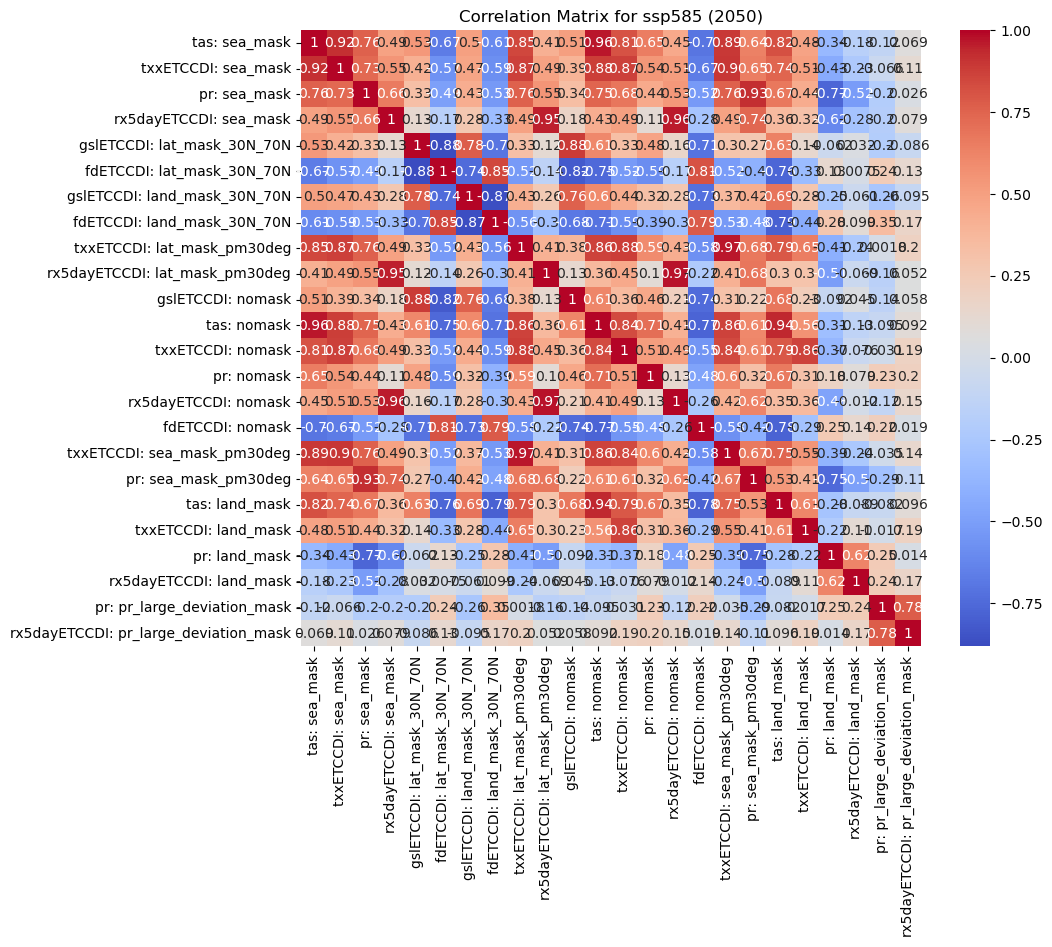

In [57]:
import matplotlib.pyplot as plt

for year in [2020, 2030, 2040, 2050]:
    
    for scenario in SSPs:
        scenario_df = data_frames[year][scenario]
                
        correlation_matrix = scenario_df.corr()
        plt.figure(figsize=(10, 8))  # Set the figure size as per your requirement
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Correlation Matrix for {scenario} ({year})')
        plt.show()
      
        